# World Happiness Report Project

importing all dependencies

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(font_scale=1,palette='colorblind')

In [2]:
report=pd.read_csv('happiness_score_dataset.csv')

In [4]:
report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
report.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
happiness_report=report.head()
happiness_report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [43]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [44]:
report.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [45]:
report.rename(columns = {'Happiness Score':'happiness_score'}, inplace = True)

In [46]:
report.rename(columns = {'Economy (GDP per Capita)':'Economy'}, inplace = True)

Text(0, 0.5, 'Economy')

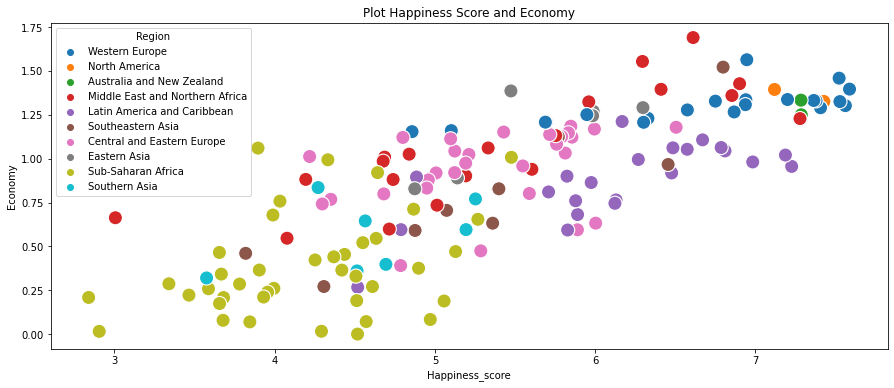

In [50]:
#Plotting graph between happiness score and Economy(GDP per capita)
plt.figure(figsize=(15, 6))
plt.title('Plot Happiness Score and Economy')
sns.scatterplot(x=report.happiness_score,y=report.Economy,hue=report.Region,s=200)
plt.xlabel('Happiness_score')
plt.ylabel('Economy')



In [84]:
report['happiness_score'].max()

7.587

C:\Users\maham\AppData\Local\Temp/ipykernel_5700/3048026113.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correl,mask=np.zeros_like(correl,dtype=np.bool),cmap='Blues',square=True,ax=ax)


<AxesSubplot:>

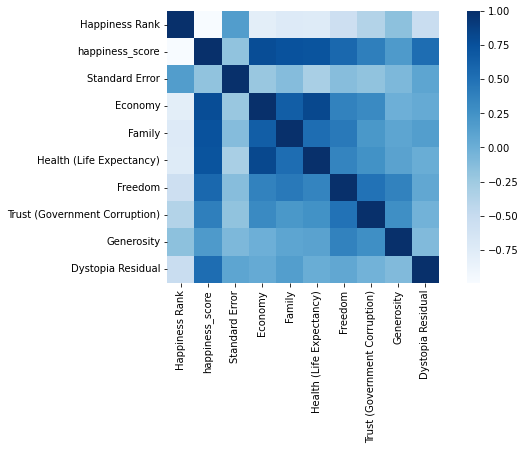

In [69]:
correl=report.corr('pearson')
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(correl,mask=np.zeros_like(correl,dtype=np.bool),cmap='Blues',square=True,ax=ax)

In [70]:
feature_vars = report
target_var = report['happiness_score']

In [71]:
# dropping irrelevant features
feature_vars = feature_vars.drop('happiness_score', axis = 1)
feature_vars = feature_vars.drop('Country', axis = 1)
feature_vars = feature_vars.drop('Region', axis = 1)

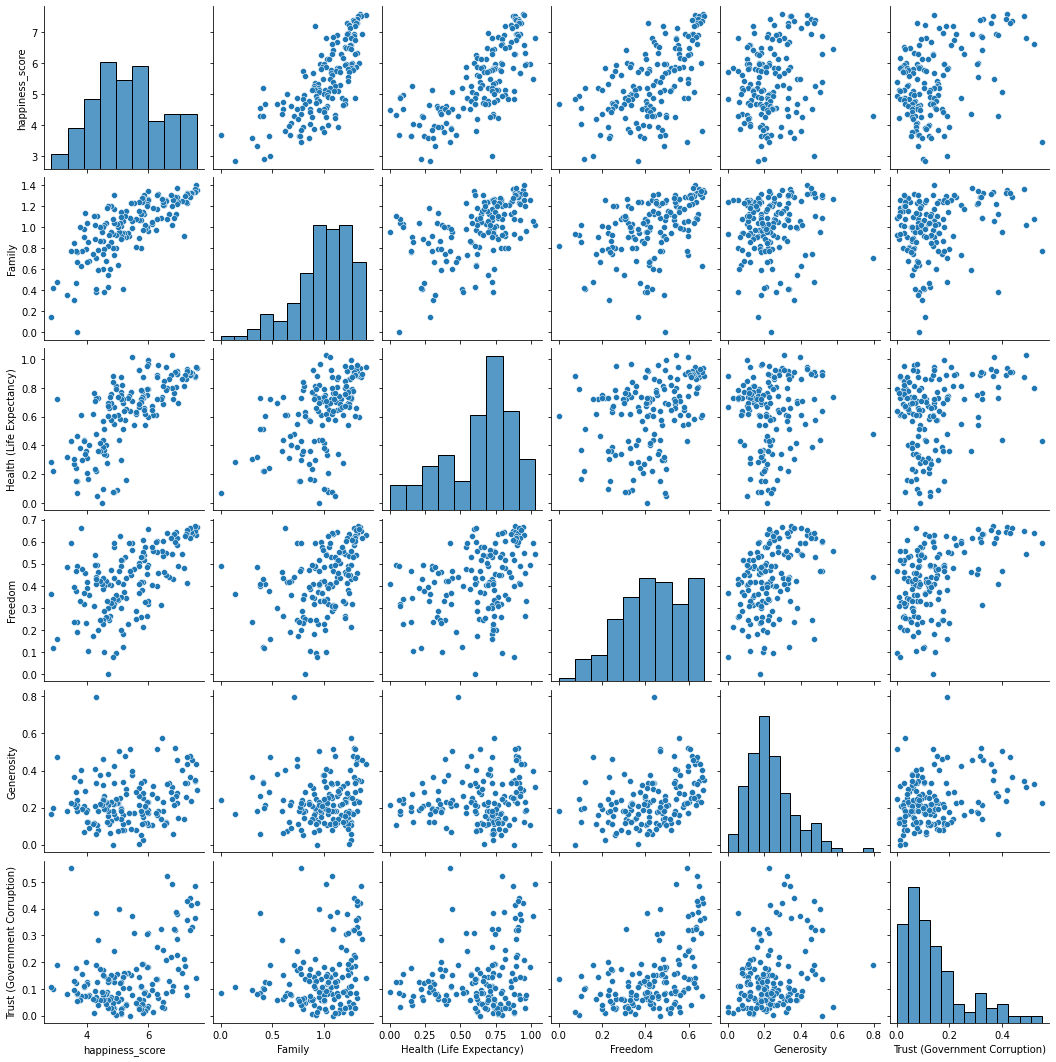

In [74]:
sns.pairplot(report[['happiness_score','Family', 'Health (Life Expectancy)','Freedom', 'Generosity','Trust (Government Corruption)']])

In [77]:
X_train,X_test, y_train,y_test = train_test_split(feature_vars, target_var, train_size=.75)

lm = linear_model.LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred = lm.predict(X_test)

In [79]:
r2_score(y_test, y_pred)

0.9999999244235057

In [80]:
lm.coef_, lm.intercept_

(array([-3.41651687e-06, -3.93794596e-04,  1.00008067e+00,  9.99700661e-01,
         9.99619003e-01,  9.99708033e-01,  9.99450769e-01,  1.00003096e+00,
         9.99899716e-01]),
 0.0011558838370628877)

In [81]:
feature_vars.columns

Index(['Happiness Rank', 'Standard Error', 'Economy', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Text(0, 0.5, 'Happiness Score')

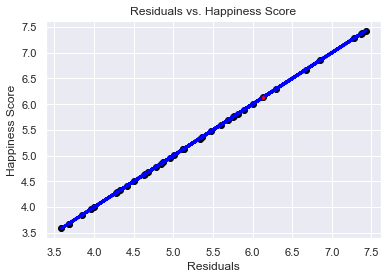

In [82]:
plt.scatter(y_test,y_pred, color='black')
plt.plot(y_pred,y_pred, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(y_test, y_pred,y_test)]

plt.title('Residuals vs. Happiness Score')
plt.xlabel('Residuals')
plt.ylabel('Happiness Score')